In [1]:
import os
import sys
import numpy as np
np.set_printoptions(suppress=True, linewidth=200)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set(style="whitegrid", font_scale=1.13, rc={"lines.linewidth": 3.5})
plt.rcParams['axes.formatter.useoffset'] = True
sys.path.append('./src')
set2_colors = sns.color_palette("Set2")

In [2]:
def return_fdm_solution(shock_expo, dt, nW, chiUnderline, a_e, a_h, gamma_e, gamma_h, rho_e, rho_h, delta_e, delta_h, lambda_d, nu, action_name, nZ):

    rho_e_t = "{:0.3f}".format(rho_e)
    rho_h_t = "{:0.3f}".format(rho_h)
    gamma_e_t = "{:0.3f}".format(gamma_e)
    gamma_h_t = "{:0.3f}".format(gamma_h)
    a_e_t = "{:0.3f}".format(a_e)
    a_h_t = "{:0.3f}".format(a_h)
    chiUnderline_t = "{:0.3f}".format(chiUnderline)
    delta_e_t = "{:0.3f}".format(delta_e)
    delta_h_t = "{:0.3f}".format(delta_h)
    lambda_d_t = "{:0.3f}".format(lambda_d)
    nu_t = "{:0.3f}".format(nu)

    folder_name = ('output/' + action_name + '/' + shock_expo + '/dt_'+str(dt)+'/nW_'+str(nW)+'_nZ_'+str(nZ)+'/chiUnderline_' + chiUnderline_t + '/a_e_' + a_e_t + '_a_h_' + a_h_t  + '/gamma_e_' + gamma_e_t + '_gamma_h_' + gamma_h_t + '/rho_e_' + rho_e_t + '_rho_h_' + rho_h_t + '/delta_e_' + delta_e_t + '_delta_h_' + delta_h_t + '/lambda_d_' + lambda_d_t + '_nu_' + nu_t)

    def extract_lines_from_file(file_path, phrase):
        extracted_lines = []
        with open(file_path, 'r') as file:
            for line in file:
                if line.startswith(phrase):
                    extracted_lines.append(line.strip())
        return extracted_lines

    file_path = folder_name + '/log.txt' 
    phrase = 'END OF ITERATIONS:'
    extracted_lines = extract_lines_from_file(file_path, phrase)
    try:
        print('rho_e: ', rho_e, ', rho_h: ', rho_h, ', gamma_e: ', gamma_e, ', gamma_h: ', gamma_h, ', a_e: ', a_e, ', a_h: ', a_h, ', chiUnderline: ', chiUnderline, ', results:', extracted_lines[0])
    except:
        print('rho_e: ', rho_e, ', rho_h: ', rho_h, ', gamma_e: ', gamma_e, ', gamma_h: ', gamma_h, ', a_e: ', a_e, ', a_h: ', a_h, ', chiUnderline: ', chiUnderline, ', running in progress')
    
    def read_dat(filename):
        with open(folder_name + '/'+filename+'.dat', 'r') as file:
            data = [float(line.strip()) for line in file if line.strip()]
        return pd.DataFrame(data, columns=[filename])
    
    W = read_dat('W')
    Z = read_dat('Z')
    
    with open(folder_name + '/PiE_final_TFP.pkl' , 'rb') as file:
        PiE_final_TFP = pickle.load(file)
    with open(folder_name + '/kappa_final.pkl' , 'rb') as file:
        kappa_final = pickle.load(file)

    dents = pd.read_csv(folder_name + '/dent.txt',names = ['dent'])
    dents = pd.concat([W,Z,dents], axis=1)
    dents = dents.groupby('W').sum()['dent']

    try:
        elasticities_W0 = np.load(folder_name+'/elasticity_W_0.npz',allow_pickle=True)
        elasticities_W1 = np.load(folder_name+'/elasticity_W_1.npz',allow_pickle=True)
        elasticities_W2 = np.load(folder_name+'/elasticity_W_2.npz',allow_pickle=True)
    except:
        elasticities_W0 = None
        elasticities_W1 = None
        elasticities_W2 = None
    
    return {'W':W, 'Z':Z, 'PiE_final_TFP':PiE_final_TFP, 'dents':dents, 'kappa_final':kappa_final, 'elasticities_W0':elasticities_W0, 'elasticities_W1':elasticities_W1, 'elasticities_W2':elasticities_W2}
            

In [3]:
model_070_lower_triangular = return_fdm_solution(shock_expo = 'lower_triangular',dt = 0.01, nW = 1800, nZ = 30, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.070, gamma_e = 2.0, gamma_h = 2.0, rho_e = 1.0, rho_h = 1.0, delta_e = 0.03, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, action_name = 'finite_difference')
model_080_lower_triangular = return_fdm_solution(shock_expo = 'lower_triangular',dt = 0.01, nW = 1800, nZ = 30, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.080, gamma_e = 2.0, gamma_h = 2.0, rho_e = 1.0, rho_h = 1.0, delta_e = 0.03, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, action_name = 'finite_difference')
model_085_lower_triangular = return_fdm_solution(shock_expo = 'lower_triangular',dt = 0.01, nW = 1800, nZ = 30, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.085, gamma_e = 2.0, gamma_h = 2.0, rho_e = 1.0, rho_h = 1.0, delta_e = 0.03, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, action_name = 'finite_difference')


model_070_upper_triangular = return_fdm_solution(shock_expo = 'upper_triangular',dt = 0.01, nW = 1800, nZ = 30, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.070, gamma_e = 2.0, gamma_h = 2.0, rho_e = 1.0, rho_h = 1.0, delta_e = 0.03, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, action_name = 'finite_difference')
model_080_upper_triangular = return_fdm_solution(shock_expo = 'upper_triangular',dt = 0.01, nW = 1800, nZ = 30, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.080, gamma_e = 2.0, gamma_h = 2.0, rho_e = 1.0, rho_h = 1.0, delta_e = 0.03, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, action_name = 'finite_difference')
model_085_upper_triangular = return_fdm_solution(shock_expo = 'upper_triangular',dt = 0.01, nW = 1800, nZ = 30, chiUnderline = 1.0, a_e = 0.0922, a_h = 0.085, gamma_e = 2.0, gamma_h = 2.0, rho_e = 1.0, rho_h = 1.0, delta_e = 0.03, delta_h = 0.01, lambda_d = 0.0, nu = 0.1, action_name = 'finite_difference')

rho_e:  1.0 , rho_h:  1.0 , gamma_e:  2.0 , gamma_h:  2.0 , a_e:  0.0922 , a_h:  0.07 , chiUnderline:  1.0 , results: END OF ITERATIONS: TOLERANCE MET
rho_e:  1.0 , rho_h:  1.0 , gamma_e:  2.0 , gamma_h:  2.0 , a_e:  0.0922 , a_h:  0.08 , chiUnderline:  1.0 , results: END OF ITERATIONS: TOLERANCE MET
rho_e:  1.0 , rho_h:  1.0 , gamma_e:  2.0 , gamma_h:  2.0 , a_e:  0.0922 , a_h:  0.085 , chiUnderline:  1.0 , results: END OF ITERATIONS: TOLERANCE MET
rho_e:  1.0 , rho_h:  1.0 , gamma_e:  2.0 , gamma_h:  2.0 , a_e:  0.0922 , a_h:  0.07 , chiUnderline:  1.0 , results: END OF ITERATIONS: TOLERANCE MET
rho_e:  1.0 , rho_h:  1.0 , gamma_e:  2.0 , gamma_h:  2.0 , a_e:  0.0922 , a_h:  0.08 , chiUnderline:  1.0 , results: END OF ITERATIONS: TOLERANCE MET
rho_e:  1.0 , rho_h:  1.0 , gamma_e:  2.0 , gamma_h:  2.0 , a_e:  0.0922 , a_h:  0.085 , chiUnderline:  1.0 , results: END OF ITERATIONS: TOLERANCE MET


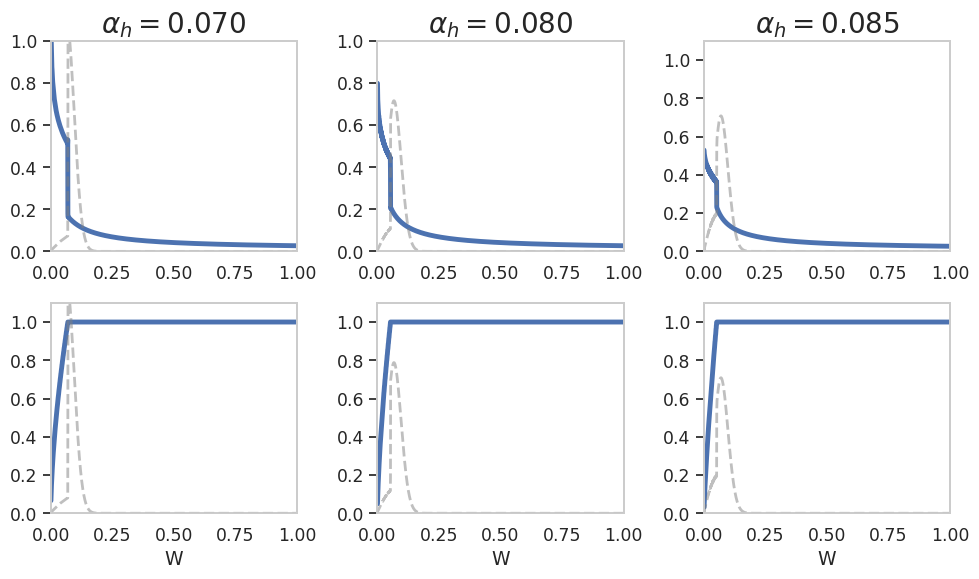

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
W = model_070_lower_triangular['W']['W'].unique()
W2 = model_070_upper_triangular['W']['W'].unique()

sns.lineplot(x = W, y = model_070_lower_triangular['PiE_final_TFP'], ax = axes[0,0])
ax2 = axes[0,0].twinx()
sns.lineplot(x = W2, y = model_070_upper_triangular['dents'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_yticklabels([])
axes[0,0].set_title(r"$\alpha_h=0.070$", fontsize=20)
axes[0,0].set_ylim(0,1.0)
axes[0,0].set_xlim(0,1.0)
ax2.set_ylim([0,0.014])

sns.lineplot(x = W, y = model_080_lower_triangular['PiE_final_TFP'], ax = axes[0,1])
ax2 = axes[0,1].twinx()
sns.lineplot(x = W2, y = model_080_upper_triangular['dents'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_yticklabels([])
axes[0,1].set_title(r"$\alpha_h=0.080$", fontsize=20)
axes[0,1].set_ylim(0,1.0)
axes[0,1].set_xlim(0,1.0)
ax2.set_ylim([0,0.014])

sns.lineplot(x = W, y = model_085_lower_triangular['PiE_final_TFP'], ax = axes[0,2])
ax2 = axes[0,2].twinx()
sns.lineplot(x = W2, y = model_085_upper_triangular['dents'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_yticklabels([])
axes[0,2].set_title(r"$\alpha_h=0.085$", fontsize=20)
axes[0,2].set_ylim(0,1.1)
axes[0,2].set_xlim(0,1.0)
ax2.set_ylim([0,0.014])

sns.lineplot(x = W2, y = model_070_upper_triangular['kappa_final'], ax = axes[1,0])
ax2 = axes[1,0].twinx()
sns.lineplot(x = W2, y = model_070_upper_triangular['dents'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_yticklabels([])
axes[1,0].set_ylim(0,1.1)
axes[1,0].set_xlim(0,1.0)
axes[1,0].set_xlabel('W')
ax2.set_ylim([0,0.014])

sns.lineplot(x = W2, y = model_080_upper_triangular['kappa_final'], ax = axes[1,1])
ax2 = axes[1,1].twinx()
sns.lineplot(x = W2, y = model_080_upper_triangular['dents'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_yticklabels([])
axes[1,1].set_ylim(0,1.1)
axes[1,1].set_xlim(0,1.0)
axes[1,1].set_xlabel('W')
ax2.set_ylim([0,0.014])

sns.lineplot(x = W2, y = model_085_upper_triangular['kappa_final'], ax = axes[1,2])
ax2 = axes[1,2].twinx()
sns.lineplot(x = W2, y =  model_085_upper_triangular['dents'].values, ax = ax2, ls='--', color='grey',lw=2.0, alpha=0.5)
ax2.grid(False)
ax2.set_yticks([])
ax2.set_yticklabels([])
axes[1,2].set_ylim(0,1.1)
axes[1,2].set_xlim(0,1.0)
axes[1,2].set_xlabel('W')
ax2.set_ylim([0,0.014])

for ax in axes.flatten():
    ax.grid(False)

plt.tight_layout()
plt.savefig("plots/figure_13.pdf")
plt.show()


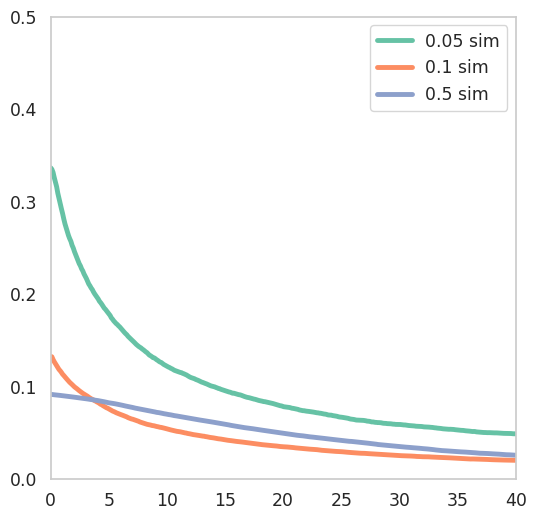

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.lineplot(x=np.linspace(0,49,480), y=model_080_lower_triangular['elasticities_W0']['exposure_elasticity'], label='0.05 sim', ls='-',color = set2_colors[0])
sns.lineplot(x=np.linspace(0,49,480), y=model_080_lower_triangular['elasticities_W1']['exposure_elasticity'], label='0.1 sim', ls='-',color = set2_colors[1])
sns.lineplot(x=np.linspace(0,49,480), y=model_080_lower_triangular['elasticities_W2']['exposure_elasticity'], label='0.5 sim', ls='-',color = set2_colors[2])

ax.set_xlim(0, 40)
ax.set_ylim(0, 0.5)
ax.grid(False)
plt.legend()
plt.show()